In [160]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Análise da base de dados de partidas não profisisonais do servidor do oeste europeu (EUW):

In [161]:
df = pd.read_csv('games.csv')
df.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [162]:
def novo_atr_diff(df, str1, str2, novaStr, index, winflag, winVal):
    df.insert(index, novaStr, df[str1] - df[str2])
    for index, value in df[winflag].items():
        if value == winVal:
            df[novaStr][index] = -df[novaStr][index]

In [163]:
novo_atr_diff(df, 't1_towerKills', 't2_towerKills', 'towerKillsDiff', 0, 'winner', 2)
novo_atr_diff(df, 't1_inhibitorKills', 't2_inhibitorKills', 'inhibitorKillsDiff', 1, 'winner', 2)
novo_atr_diff(df, 't1_baronKills', 't2_baronKills', 'baronKillsDiff', 2, 'winner', 2)
novo_atr_diff(df, 't1_dragonKills', 't2_dragonKills', 'dragonKillsDiff', 3, 'winner', 2)
novo_atr_diff(df, 't1_riftHeraldKills', 't2_riftHeraldKills', 'riftHeraldDiff', 4, 'winner', 2)

In [164]:
df.head()

,towerKillsDiff,inhibitorKillsDiff,baronKillsDiff,dragonKillsDiff,riftHeraldDiff,gameId,creationTime,gameDuration,seasonId,winner,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,6,1,2,2,-1,3326086514,1504279457970,1949,9,1,...,5,0,0,1,1,114,67,43,16,51
1,8,4,0,2,1,3229566029,1497848803862,1851,9,1,...,2,0,0,0,0,11,67,238,51,420
2,6,1,1,0,0,3327363504,1504360103310,1493,9,1,...,2,0,0,1,0,157,238,121,57,28
3,9,2,1,2,0,3326856598,1504348503996,1758,9,1,...,0,0,0,0,0,164,18,141,40,51
4,6,2,1,2,0,3330080762,1504554410899,2094,9,1,...,3,0,0,1,0,86,11,201,122,18


In [165]:
def meu_plot(atributo, x, y, discr=True):
    bins = 40
    if discr:
        d = np.diff(np.unique(atributo)).min()
        left_of_first_bin = atributo.min() - float(d)/2
        right_of_last_bin = atributo.max() + float(d)/2
        bins = np.arange(left_of_first_bin, right_of_last_bin + d, d)
    plt.figure(figsize=(16, 8))
    plt.hist(atributo, edgecolor='k', bins=bins)
    plt.xlabel(x)
    plt.ylabel(y)
    ax = plt.gca()
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(18)

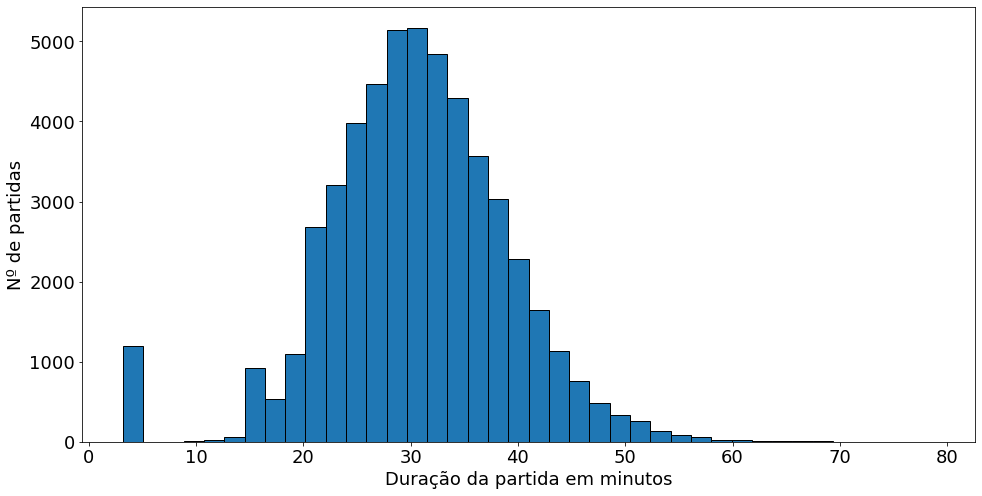

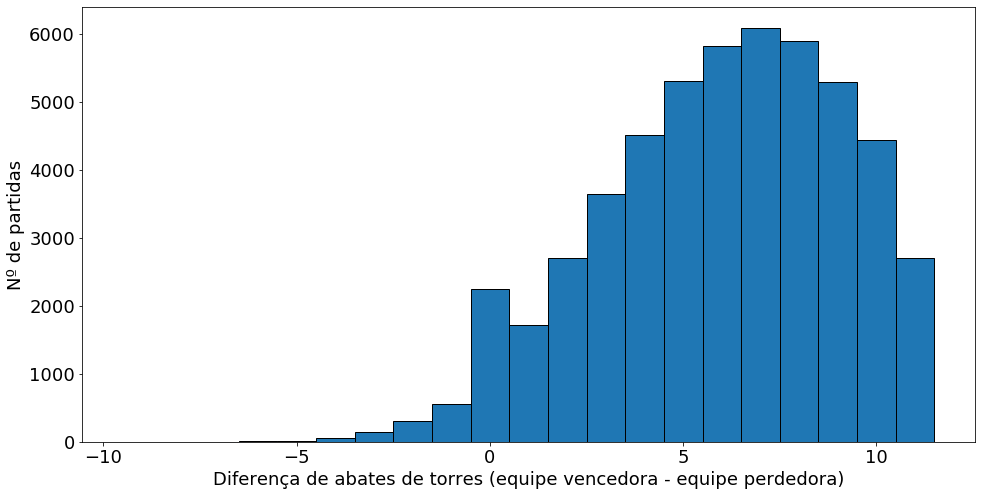

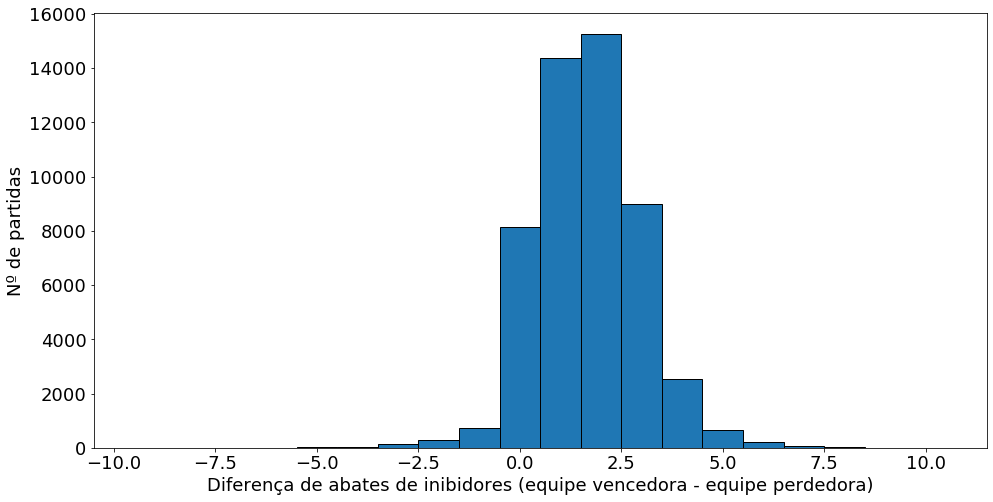

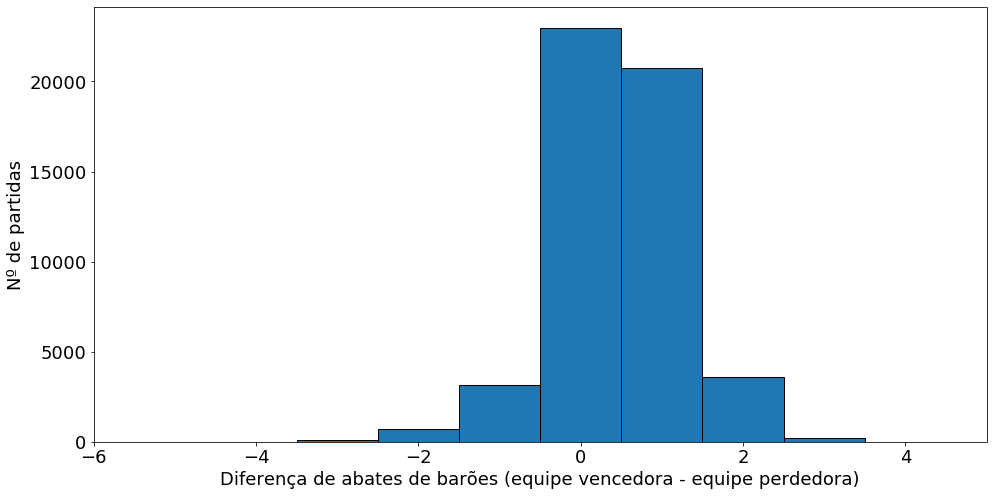

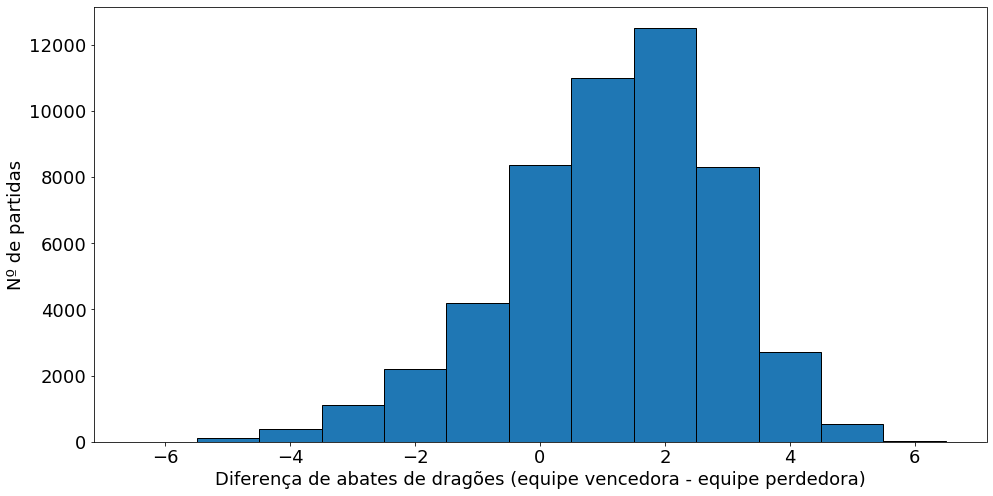

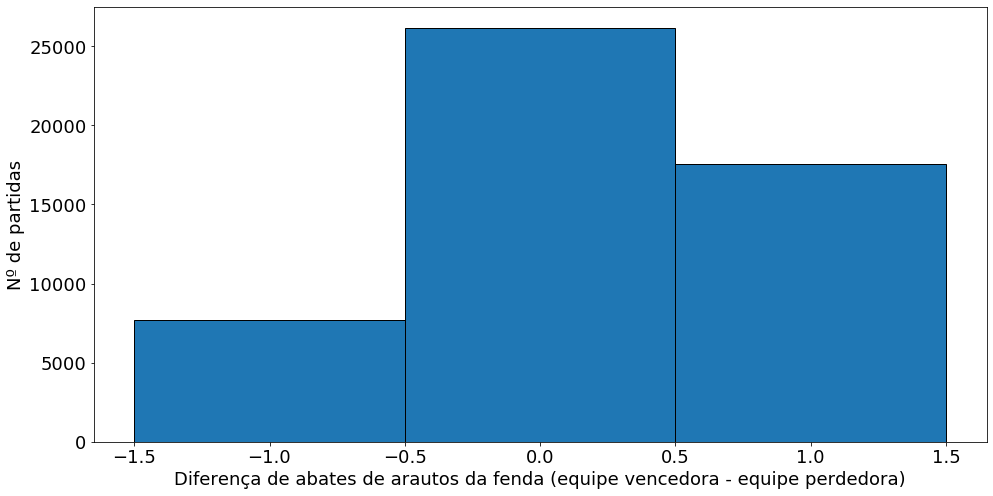

In [166]:
meu_plot(df['gameDuration']/60, 'Duração da partida em minutos', 'Nº de partidas', discr=False)
meu_plot(df['towerKillsDiff'], 'Diferença de abates de torres (equipe vencedora - equipe perdedora)', 'Nº de partidas')
meu_plot(df['inhibitorKillsDiff'], 'Diferença de abates de inibidores (equipe vencedora - equipe perdedora)', 'Nº de partidas')
meu_plot(df['baronKillsDiff'], 'Diferença de abates de barões (equipe vencedora - equipe perdedora)', 'Nº de partidas')
meu_plot(df['dragonKillsDiff'], 'Diferença de abates de dragões (equipe vencedora - equipe perdedora)', 'Nº de partidas')
meu_plot(df['riftHeraldDiff'], 'Diferença de abates de arautos da fenda (equipe vencedora - equipe perdedora)', 'Nº de partidas')

In [167]:
def compara(atributo1, atributo2, pr=0):
    soma = (atributo1 == atributo2).sum()
    somaVazio = (atributo2 == 0).sum()
    n = atributo1.size
    porcentagem = round(soma*100/n,2)
    porcentagemVazio = round(somaVazio*100/n,2)
    if(pr):
        print("Em {}% das partidas as equipes '{}' também conseguem '{}'. {}% das partidas não ocorre '{}'"
              .format(porcentagem, atributo1.name, atributo2.name, porcentagemVazio, atributo2.name))
    return porcentagem

In [168]:
compara(df['winner'], df['firstBlood'], 1)
compara(df['winner'], df['firstTower'], 1);
compara(df['winner'], df['firstInhibitor'], 1);
compara(df['winner'], df['firstDragon'], 1);
compara(df['winner'], df['firstBaron'], 1);
compara(df['winner'], df['firstRiftHerald'], 1);
compara(df['winner'], df['firstTower'], 1);
compara(df['winner'], df['firstBaron'], 1);

Em 58.47% das partidas as equipes 'winner' também conseguem 'firstBlood'. 1.08% das partidas não ocorre 'firstBlood'
Em 69.15% das partidas as equipes 'winner' também conseguem 'firstTower'. 2.36% das partidas não ocorre 'firstTower'
Em 80.0% das partidas as equipes 'winner' também conseguem 'firstInhibitor'. 12.19% das partidas não ocorre 'firstInhibitor'
Em 65.39% das partidas as equipes 'winner' também conseguem 'firstDragon'. 3.88% das partidas não ocorre 'firstDragon'
Em 48.94% das partidas as equipes 'winner' também conseguem 'firstBaron'. 39.34% das partidas não ocorre 'firstBaron'
Em 34.14% das partidas as equipes 'winner' também conseguem 'firstRiftHerald'. 50.84% das partidas não ocorre 'firstRiftHerald'
Em 69.15% das partidas as equipes 'winner' também conseguem 'firstTower'. 2.36% das partidas não ocorre 'firstTower'
Em 48.94% das partidas as equipes 'winner' também conseguem 'firstBaron'. 39.34% das partidas não ocorre 'firstBaron'


In [169]:
df.to_csv('gamesExtended.csv', sep=',')

## Análise da base de dados de jogos competitivos profissionais.

In [170]:
df2 = pd.read_csv('LeagueofLegends.csv')
df2.columns

Index(['League', 'Year', 'Season', 'Type', 'blueTeamTag', 'bResult', 'rResult',
       'redTeamTag', 'gamelength', 'golddiff', 'goldblue', 'bKills', 'bTowers',
       'bInhibs', 'bDragons', 'bBarons', 'bHeralds', 'goldred', 'rKills',
       'rTowers', 'rInhibs', 'rDragons', 'rBarons', 'rHeralds', 'blueTop',
       'blueTopChamp', 'goldblueTop', 'blueJungle', 'blueJungleChamp',
       'goldblueJungle', 'blueMiddle', 'blueMiddleChamp', 'goldblueMiddle',
       'blueADC', 'blueADCChamp', 'goldblueADC', 'blueSupport',
       'blueSupportChamp', 'goldblueSupport', 'blueBans', 'redTop',
       'redTopChamp', 'goldredTop', 'redJungle', 'redJungleChamp',
       'goldredJungle', 'redMiddle', 'redMiddleChamp', 'goldredMiddle',
       'redADC', 'redADCChamp', 'goldredADC', 'redSupport', 'redSupportChamp',
       'goldredSupport', 'redBans', 'Address'],
      dtype='object')

In [171]:
df2.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...


In [172]:
def edit_atr_count_str(dfColumn, word):
    for index, value in dfColumn.items():
        dfColumn[index] = dfColumn[index].count(word)

In [173]:
edit_atr_count_str(df2['bTowers'], "TURRET")
edit_atr_count_str(df2['rTowers'], "TURRET")
novo_atr_diff(df2, 'bTowers', 'rTowers', 'towerKillsDiff', 0, 'bResult', 0)

In [174]:
edit_atr_count_str(df2['bInhibs'], "LANE")
edit_atr_count_str(df2['rInhibs'], "LANE")
novo_atr_diff(df2, 'bInhibs', 'rInhibs', 'inhibitorKillsDiff', 0, 'bResult', 0)

In [175]:
df2['bDragons'] = df2['bDragons'].str.replace('None', 'DRAGON')
edit_atr_count_str(df2['bDragons'], "DRAGON")
edit_atr_count_str(df2['rDragons'], "DRAGON")
novo_atr_diff(df2, 'bDragons', 'rDragons', 'dragonKillsDiff', 0, 'bResult', 0)

In [176]:
edit_atr_count_str(df2['bBarons'], ".")
edit_atr_count_str(df2['rBarons'], ".")
novo_atr_diff(df2, 'bBarons', 'rBarons', 'baronKillsDiff', 0, 'bResult', 0)

In [177]:
edit_atr_count_str(df2['bHeralds'], ".")
edit_atr_count_str(df2['rHeralds'], ".")
novo_atr_diff(df2, 'bHeralds', 'rHeralds', 'riftHeraldDiff', 0, 'bResult', 0)

In [178]:
edit_atr_count_str(df2['bKills'], ".")
edit_atr_count_str(df2['rKills'], ".")
novo_atr_diff(df2, 'bKills', 'rKills', 'killsDiff', 0, 'bResult', 0)

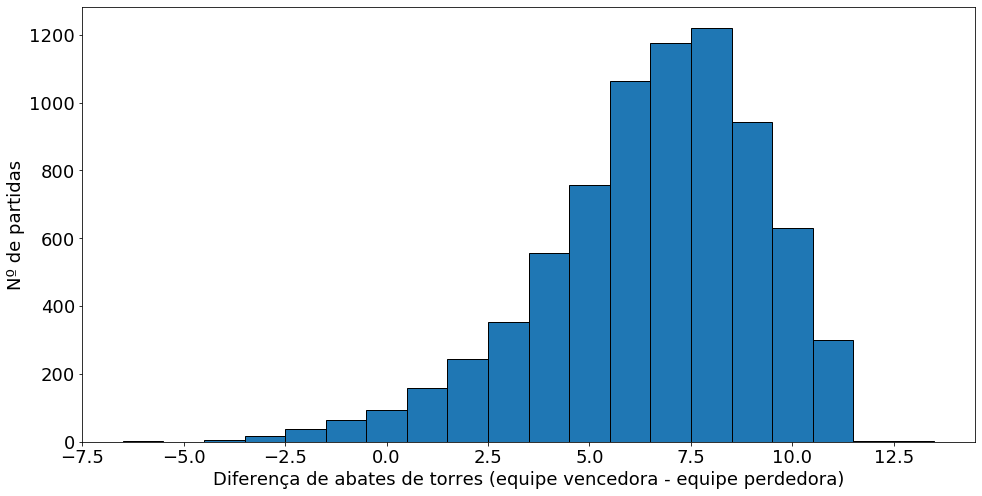

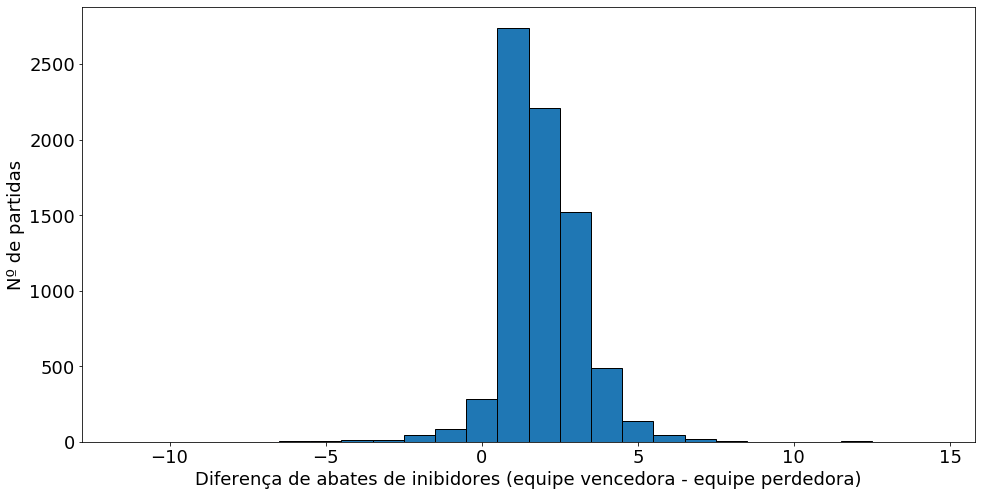

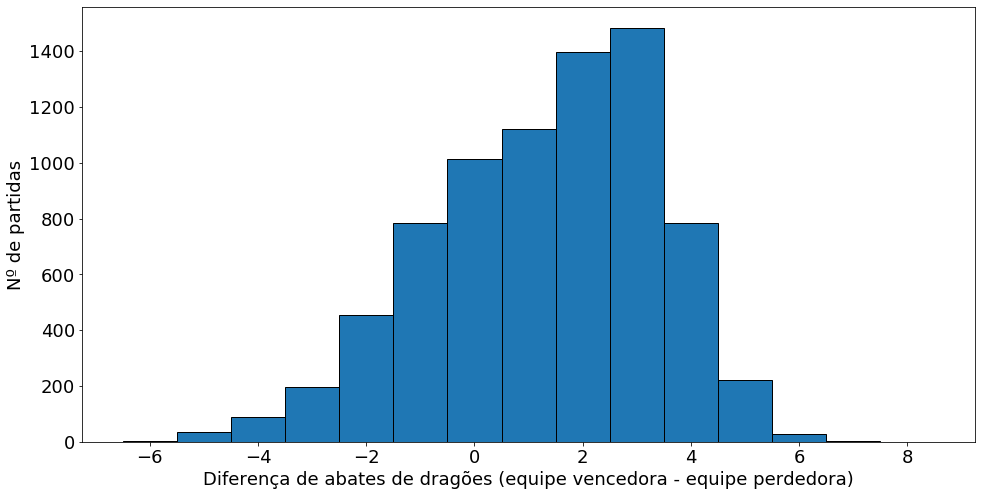

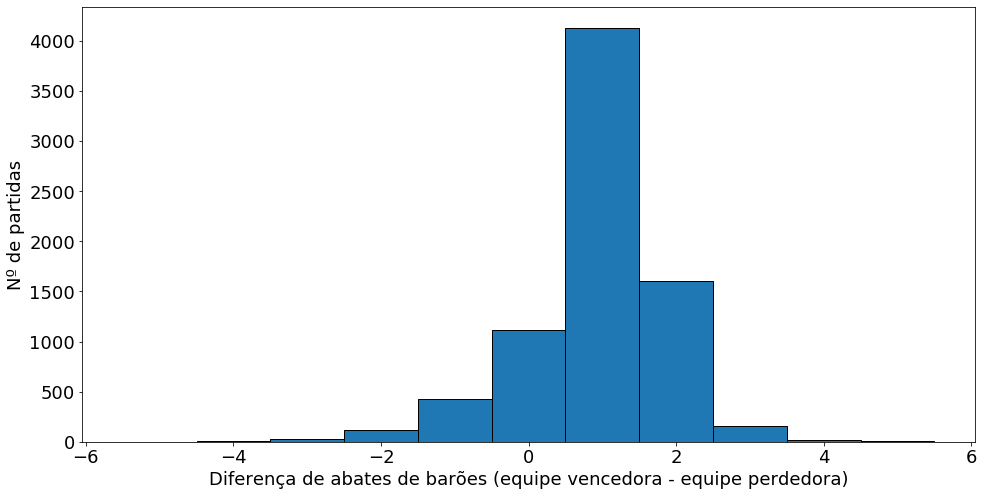

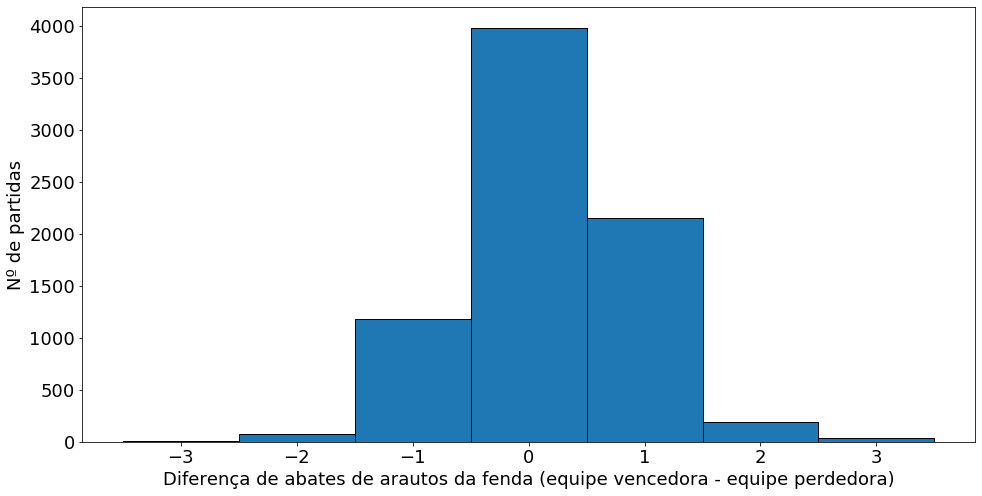

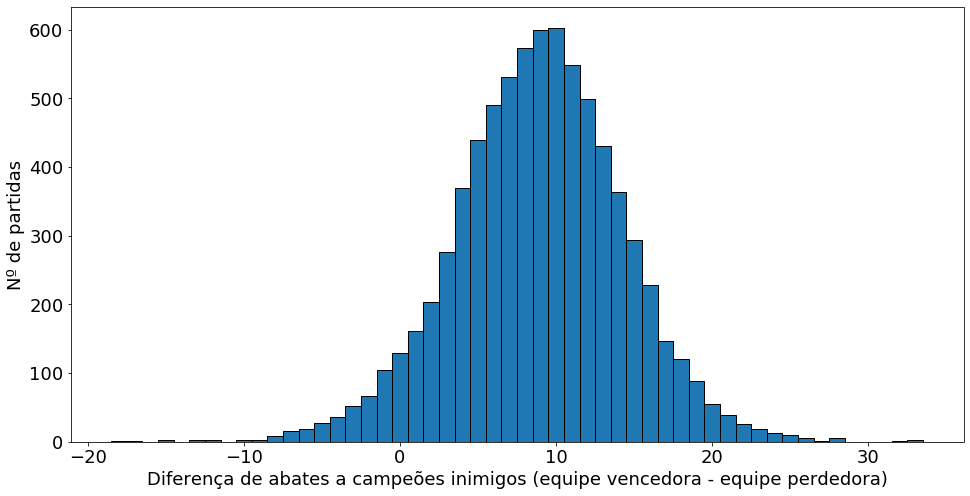

In [179]:
meu_plot(df2['towerKillsDiff'], 'Diferença de abates de torres (equipe vencedora - equipe perdedora)', 'Nº de partidas')
meu_plot(df2['inhibitorKillsDiff'], 'Diferença de abates de inibidores (equipe vencedora - equipe perdedora)', 'Nº de partidas')
meu_plot(df2['dragonKillsDiff'], 'Diferença de abates de dragões (equipe vencedora - equipe perdedora)', 'Nº de partidas')
meu_plot(df2['baronKillsDiff'], 'Diferença de abates de barões (equipe vencedora - equipe perdedora)', 'Nº de partidas')
meu_plot(df2['riftHeraldDiff'], 'Diferença de abates de arautos da fenda (equipe vencedora - equipe perdedora)', 'Nº de partidas')
meu_plot(df2['killsDiff'], 'Diferença de abates a campeões inimigos (equipe vencedora - equipe perdedora)', 'Nº de partidas')

In [180]:
df2.columns

Index(['killsDiff', 'riftHeraldDiff', 'baronKillsDiff', 'dragonKillsDiff',
       'inhibitorKillsDiff', 'towerKillsDiff', 'League', 'Year', 'Season',
       'Type', 'blueTeamTag', 'bResult', 'rResult', 'redTeamTag', 'gamelength',
       'golddiff', 'goldblue', 'bKills', 'bTowers', 'bInhibs', 'bDragons',
       'bBarons', 'bHeralds', 'goldred', 'rKills', 'rTowers', 'rInhibs',
       'rDragons', 'rBarons', 'rHeralds', 'blueTop', 'blueTopChamp',
       'goldblueTop', 'blueJungle', 'blueJungleChamp', 'goldblueJungle',
       'blueMiddle', 'blueMiddleChamp', 'goldblueMiddle', 'blueADC',
       'blueADCChamp', 'goldblueADC', 'blueSupport', 'blueSupportChamp',
       'goldblueSupport', 'blueBans', 'redTop', 'redTopChamp', 'goldredTop',
       'redJungle', 'redJungleChamp', 'goldredJungle', 'redMiddle',
       'redMiddleChamp', 'goldredMiddle', 'redADC', 'redADCChamp',
       'goldredADC', 'redSupport', 'redSupportChamp', 'goldredSupport',
       'redBans', 'Address'],
      dtype='object')

In [181]:
def count_str_ints(dfColumn, strIdx=-1):
    dfColumn = dfColumn.copy()
    for index, value in dfColumn.items():
        dfColumn[index] = list(map(int, re.findall(r'\d+', dfColumn[index])))[strIdx]
    return dfColumn

In [182]:
minut = 10
df2.insert(0, 'goldblue at {} min'.format(minut), count_str_ints(df2['goldblue'], minut))
df2.insert(0, 'goldred at {} min'.format(minut), count_str_ints(df2['goldred'], minut))

In [186]:
minut = 5
df2.insert(0, 'goldblue at {} min'.format(minut), count_str_ints(df2['goldblue'], minut))
df2.insert(0, 'goldred at {} min'.format(minut), count_str_ints(df2['goldred'], minut))

In [183]:
df2.insert(0, 'goldblue at {} min'.format(minut), count_str_ints(df2['goldblue']))
df2.insert(0, 'goldred at {} min'.format(minut), count_str_ints(df2['goldred']))

In [187]:
df2.to_csv('LeagueofLegendsExtended.csv')

## Análise da base de dados relacionada a performance individual dos jogadores não profisisonais:

In [188]:
df3 = pd.read_csv('stats1.csv')
df3.columns

Index(['id', 'win', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
       'trinket', 'kills', 'deaths', 'assists', 'largestkillingspree',
       'largestmultikill', 'killingsprees', 'longesttimespentliving',
       'doublekills', 'triplekills', 'quadrakills', 'pentakills',
       'legendarykills', 'totdmgdealt', 'magicdmgdealt', 'physicaldmgdealt',
       'truedmgdealt', 'largestcrit', 'totdmgtochamp', 'magicdmgtochamp',
       'physdmgtochamp', 'truedmgtochamp', 'totheal', 'totunitshealed',
       'dmgselfmit', 'dmgtoobj', 'dmgtoturrets', 'visionscore', 'timecc',
       'totdmgtaken', 'magicdmgtaken', 'physdmgtaken', 'truedmgtaken',
       'goldearned', 'goldspent', 'turretkills', 'inhibkills',
       'totminionskilled', 'neutralminionskilled', 'ownjunglekills',
       'enemyjunglekills', 'totcctimedealt', 'champlvl', 'pinksbought',
       'wardsbought', 'wardsplaced', 'wardskilled', 'firstblood'],
      dtype='object')

In [189]:
df3.head()

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,0,3748,2003,3111,3053,1419,1042,3340,6,...,69,42,27,610,13,0,0,10,0,0
1,10,0,2301,3111,3190,3107,0,0,3364,0,...,1,1,0,211,14,1,0,17,3,0
2,11,0,1055,3072,3006,3031,3046,1036,3340,7,...,3,1,2,182,14,1,0,13,5,0
3,12,0,1029,3078,3156,1001,3053,0,3340,5,...,6,6,0,106,15,0,0,3,0,0
4,13,0,3020,1058,3198,3102,1052,1026,3340,2,...,4,3,1,159,15,0,0,10,0,0


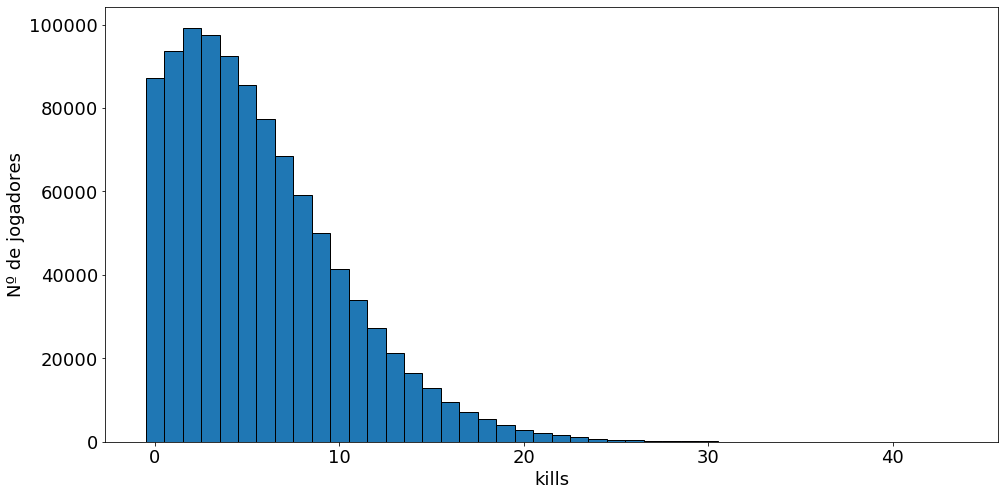

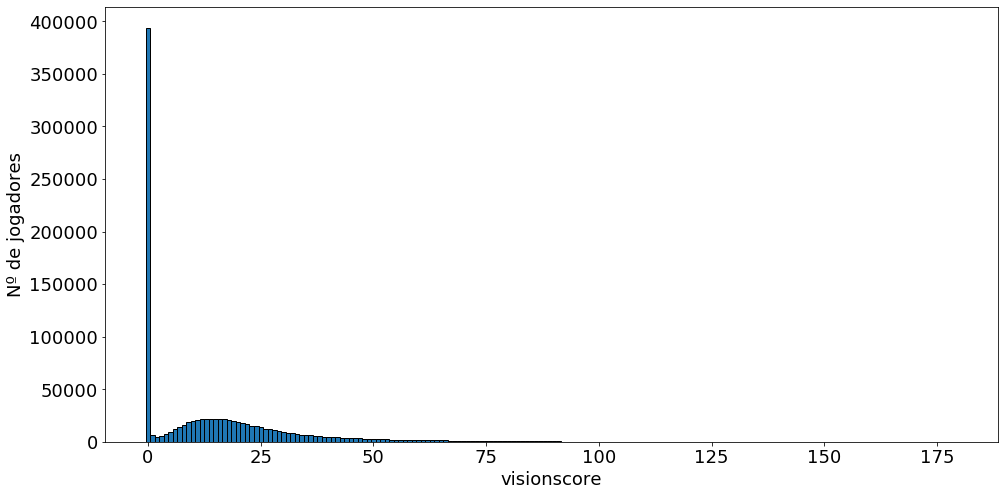

In [192]:
meu_plot(df3['kills'], 'kills', 'Nº de jogadores')
meu_plot(df3['visionscore'], 'visionscore', 'Nº de jogadores')